## Import Packages

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

## Import Dataset

In [2]:
car_data = pd.read_csv("car.data", header=None)
car_data.columns = ["buying", "maint", "doors", "persons", "lug_boot", "safety", "class"]

In [3]:
car_data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [4]:
len(car_data)

1728

### Modify buying as:

1 - vhigh <br>
2 - high <br>
3 - med <br>
4 - low <br>

In [5]:
car_data['buying'].unique()

array(['vhigh', 'high', 'med', 'low'], dtype=object)

In [6]:
new_buying = []
for i in range(0, len(car_data)) :
    if car_data['buying'][i] == 'vhigh' :
        new_buying.append(1)
    elif car_data['buying'][i] == 'high' :
        new_buying.append(2)
    elif car_data['buying'][i] == 'med' :
        new_buying.append(3)
    elif car_data['buying'][i] == 'low' :
        new_buying.append(4)
car_data['buying'] = new_buying

### Modify maint as:

1 - vhigh <br>
2 - high <br>
3 - med <br>
4 - low <br>

In [7]:
car_data['maint'].unique()

array(['vhigh', 'high', 'med', 'low'], dtype=object)

In [8]:
new_maint = []
for i in range(0, len(car_data)) :
    if car_data['maint'][i] == 'vhigh' :
        new_maint.append(1)
    elif car_data['maint'][i] == 'high' :
        new_maint.append(2)
    elif car_data['maint'][i] == 'med' :
        new_maint.append(3)
    elif car_data['maint'][i] == 'low' :
        new_maint.append(4)
car_data['maint'] = new_maint

### Modify doors as:

2 - 2 <br>
3 - 3 <br>
4 - 4 <br>
5 - 5more <br>

In [9]:
car_data['doors'].unique()

array(['2', '3', '4', '5more'], dtype=object)

In [10]:
new_doors = []
for i in range(0, len(car_data)) :
    if car_data['doors'][i] == '5more' :
        new_doors.append(5)
    else :
        new_doors.append(int(car_data['doors'][i]))
car_data['doors'] = new_doors

### Modify persons as:
2 - 2<br>
4 - 4<br>
5 - more<br>

In [11]:
car_data['persons'].unique()

array(['2', '4', 'more'], dtype=object)

In [12]:
new_persons = []
for i in range(0, len(car_data)) :
    if car_data['persons'][i] == 'more' :
        new_persons.append(5)
    else :
        new_persons.append(int(car_data['persons'][i]))
car_data['persons'] = new_persons

###  Modify lug_boot as:

1 - big <br>
2 - med <br>
3 - small <br>

In [13]:
car_data['lug_boot'].unique()

array(['small', 'med', 'big'], dtype=object)

In [14]:
new_lug_boot = []
for i in range(0, len(car_data)) :
    if car_data['lug_boot'][i] == 'big' :
        new_lug_boot.append(1)
    elif car_data['lug_boot'][i] == 'med' :
        new_lug_boot.append(2)
    elif car_data['lug_boot'][i] == 'small' :
        new_lug_boot.append(3)
car_data['lug_boot'] = new_lug_boot

### Modify safety as:

1- high <br>
2 - med <br>
3 - low <br>

In [15]:
car_data['safety'].unique()

array(['low', 'med', 'high'], dtype=object)

In [16]:
new_safety = []
for i in range(0, len(car_data)) :
    if car_data['safety'][i] == 'high' :
        new_safety.append(1)
    elif car_data['safety'][i] == 'med' :
        new_safety.append(2)
    elif car_data['safety'][i] == 'low' :
        new_safety.append(3)
car_data['safety'] = new_safety

### Modify class as:

1 - vgood <br>
2 - good <br>
3 - acc <br>
4 - unacc <br>

In [17]:
car_data['class'].unique()

array(['unacc', 'acc', 'vgood', 'good'], dtype=object)

In [18]:
new_class = []
for i in range(0, len(car_data)) :
    if car_data['class'][i] == 'vgood' :
        new_class.append(1)
    elif car_data['class'][i] == 'good' :
        new_class.append(2)
    elif car_data['class'][i] == 'acc' :
        new_class.append(3)
    elif car_data['class'][i] == 'unacc' :
        new_class.append(4)
car_data['class'] = new_class

#### Summary of new dataframe

In [19]:
car_data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,1,1,2,2,3,3,4
1,1,1,2,2,3,2,4
2,1,1,2,2,3,1,4
3,1,1,2,2,2,3,4
4,1,1,2,2,2,2,4


### Prepare logging dataframe

In [20]:
log_model = []
log_accuracy = []
log_precision = []
log_recall = []
log_cnf_matrix = []

def update_log(model, accuracy, precision, recall, cnf_matrix) :
    log_model.append(model)
    log_accuracy.append(accuracy)
    log_precision.append(precision)
    log_recall.append(recall)
    log_cnf_matrix.append(cnf_matrix)

### Results Preparation

In [21]:
def print_cnf_matrix(cnf_matrix) :
    class_names=[1, 2, 3, 4] # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    # create heatmap
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

In [22]:
def results(model_name, y_pred) :
    accuracy = metrics.accuracy_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred, average='micro')
    recall = metrics.recall_score(y_test, y_pred, average='micro')
    cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

    update_log(model_name, accuracy, precision, recall, cnf_matrix)

    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("Confusion Matrix:", cnf_matrix)
    
    print_cnf_matrix(cnf_matrix)

### Split data into Train and Test

In [23]:
X_train, X_test, y_train, y_test = train_test_split(car_data[['maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']], car_data['buying'], test_size=0.3, random_state=42)

## Model 1: Logistic Regression

/Users/benjaminfheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.32947976878612717
Precision: 0.32947976878612717
Recall: 0.32947976878612717
Confusion Matrix: [[63 22 22 20]
 [57 23 31 22]
 [35 14 32 43]
 [38 11 33 53]]


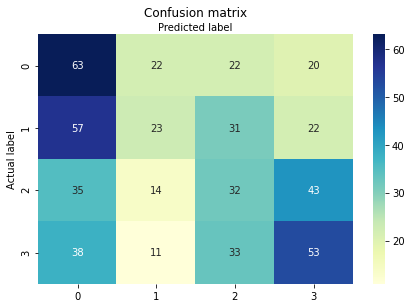

In [24]:
model_logreg = LogisticRegression()
model_logreg.fit(X_train, y_train)
y_pred_logreg = model_logreg.predict(X_test)

results("Logistic Regression", y_pred_logreg)

### Model 1: Logistic Regression (GridSearch)

In [25]:
grid_lr={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
model_logreg_gs = GridSearchCV(model_logreg, grid_lr, cv=10)
model_logreg_gs.fit(X_train, y_train)

/Users/benjaminfheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/benjaminfheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/benjaminfheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/benjaminfheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this t

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']})

In [26]:
print("tuned hyperparameters: (best parameters) ", model_logreg_gs.best_params_)
print("accuracy :",model_logreg_gs.best_score_)

tuned hyperparameters: (best parameters)  {'C': 1.0, 'penalty': 'l2'}
accuracy : 0.3374724517906336


/Users/benjaminfheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.32947976878612717
Precision: 0.32947976878612717
Recall: 0.32947976878612717
Confusion Matrix: [[63 22 22 20]
 [57 23 31 22]
 [35 14 32 43]
 [38 11 33 53]]


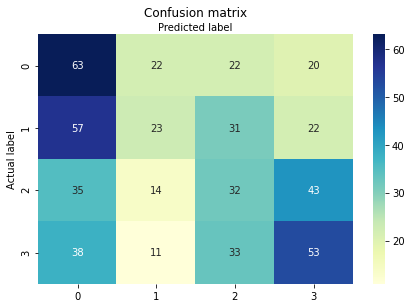

In [27]:
model_logreg_gs = LogisticRegression(C=1, penalty="l2")
model_logreg_gs.fit(X_train, y_train)
y_pred_logreg_gs = model_logreg_gs.predict(X_test)

results("Logistic Regression GridSearch (C=1, penalty='l2')", y_pred_logreg_gs)

## Model 2: Gradient Boosting

Accuracy: 0.11560693641618497
Precision: 0.11560693641618497
Recall: 0.11560693641618497
Confusion Matrix: [[16 57 26 28]
 [50  8 44 31]
 [28 32 12 52]
 [27 27 57 24]]


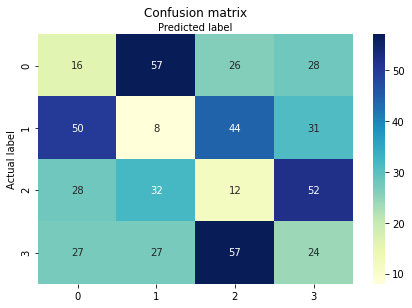

In [28]:
model_gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, random_state=42)
model_gb.fit(X_train, y_train)
y_pred_gb = model_gb.predict(X_test)

results("Gradient Boosting", y_pred_gb)

In [29]:
# defining parameter range 
param_grid = {'n_estimators': [50, 100, 200, 300, 400, 500, 600],  
              'learning_rate': [1, 0.1, 0.01, 0.001, 0.0001]}  

grid = GridSearchCV(GradientBoostingClassifier(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(X_train, y_train)

Fitting 5 folds for each of 35 candidates, totalling 175 fits
[CV] learning_rate=1, n_estimators=50 ................................
[CV] .... learning_rate=1, n_estimators=50, score=0.161, total=   0.2s
[CV] learning_rate=1, n_estimators=50 ................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] .... learning_rate=1, n_estimators=50, score=0.174, total=   0.2s
[CV] learning_rate=1, n_estimators=50 ................................
[CV] .... learning_rate=1, n_estimators=50, score=0.169, total=   0.2s
[CV] learning_rate=1, n_estimators=50 ................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s


[CV] .... learning_rate=1, n_estimators=50, score=0.256, total=   0.2s
[CV] learning_rate=1, n_estimators=50 ................................
[CV] .... learning_rate=1, n_estimators=50, score=0.220, total=   0.2s
[CV] learning_rate=1, n_estimators=100 ...............................
[CV] ... learning_rate=1, n_estimators=100, score=0.145, total=   0.4s
[CV] learning_rate=1, n_estimators=100 ...............................
[CV] ... learning_rate=1, n_estimators=100, score=0.157, total=   0.3s
[CV] learning_rate=1, n_estimators=100 ...............................
[CV] ... learning_rate=1, n_estimators=100, score=0.174, total=   0.3s
[CV] learning_rate=1, n_estimators=100 ...............................
[CV] ... learning_rate=1, n_estimators=100, score=0.219, total=   0.3s
[CV] learning_rate=1, n_estimators=100 ...............................
[CV] ... learning_rate=1, n_estimators=100, score=0.203, total=   0.3s
[CV] learning_rate=1, n_estimators=200 ...............................
[CV] .

[Parallel(n_jobs=1)]: Done 175 out of 175 | elapsed:  2.8min finished


GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [1, 0.1, 0.01, 0.001, 0.0001],
                         'n_estimators': [50, 100, 200, 300, 400, 500, 600]},
             verbose=3)

In [30]:
# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

{'learning_rate': 0.0001, 'n_estimators': 200}
GradientBoostingClassifier(learning_rate=0.0001, n_estimators=200)


Accuracy: 0.3198458574181118
Precision: 0.3198458574181118
Recall: 0.3198458574181118
Confusion Matrix: [[ 54   0  73   0]
 [ 36   0  97   0]
 [ 23   0 101   0]
 [ 11   0 113  11]]


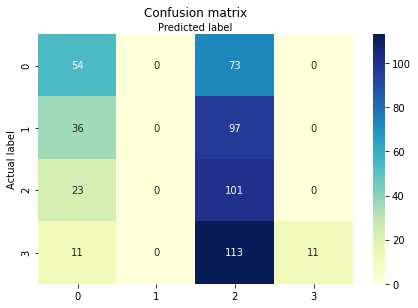

In [31]:
model_gb_cv = GradientBoostingClassifier(n_estimators=200, learning_rate=0.0001, random_state=42)
model_gb_cv.fit(X_train, y_train)
y_pred_gb_cv = model_gb_cv.predict(X_test)

results("Gradient Boosting GridSearch (n=200, lr=0.0001)", y_pred_gb_cv)

## Model 3: Support Vector Machines (SVM)

Accuracy: 0.3333333333333333
Precision: 0.3333333333333333
Recall: 0.3333333333333333
Confusion Matrix: [[72 16 18 21]
 [68 20 25 20]
 [43 12 33 36]
 [43  1 43 48]]


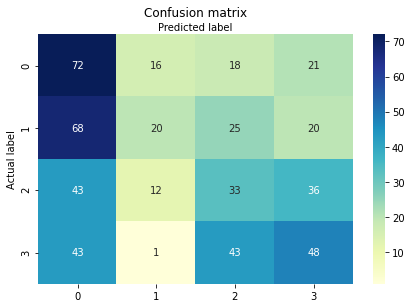

In [33]:
model_svm_linear = SVC(kernel='linear')
model_svm_linear.fit(X_train, y_train)
y_pred_svm_linear = model_svm_linear.predict(X_test)

results("Linear SVM", y_pred_svm_linear)

### Support Vector Machines (SVM) GridSearch

In [34]:
# defining parameter range 
param_grid = {'C': [10, 20, 50, 60, 70, 100],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['linear']}  

grid_svm = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid_svm.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] C=10, gamma=1, kernel=linear ....................................
[CV] ........ C=10, gamma=1, kernel=linear, score=0.355, total=   0.1s
[CV] C=10, gamma=1, kernel=linear ....................................
[CV] ........ C=10, gamma=1, kernel=linear, score=0.273, total=   0.1s
[CV] C=10, gamma=1, kernel=linear ....................................
[CV] ........ C=10, gamma=1, kernel=linear, score=0.372, total=   0.1s
[CV] C=10, gamma=1, kernel=linear ....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] ........ C=10, gamma=1, kernel=linear, score=0.343, total=   0.1s
[CV] C=10, gamma=1, kernel=linear ....................................
[CV] ........ C=10, gamma=1, kernel=linear, score=0.369, total=   0.1s
[CV] C=10, gamma=0.1, kernel=linear ..................................
[CV] ...... C=10, gamma=0.1, kernel=linear, score=0.355, total=   0.1s
[CV] C=10, gamma=0.1, kernel=linear ..................................
[CV] ...... C=10, gamma=0.1, kernel=linear, score=0.273, total=   0.1s
[CV] C=10, gamma=0.1, kernel=linear ..................................
[CV] ...... C=10, gamma=0.1, kernel=linear, score=0.372, total=   0.1s
[CV] C=10, gamma=0.1, kernel=linear ..................................
[CV] ...... C=10, gamma=0.1, kernel=linear, score=0.343, total=   0.1s
[CV] C=10, gamma=0.1, kernel=linear ..................................
[CV] ...... C=10, gamma=0.1, kernel=linear, score=0.369, total=   0.1s
[CV] C=10, gamma=0.01, kernel=linear .................................
[CV] .

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   26.3s finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [10, 20, 50, 60, 70, 100],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [35]:
# print best parameter after tuning 
print(grid_svm.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid_svm.best_estimator_) 

{'C': 10, 'gamma': 1, 'kernel': 'linear'}
SVC(C=10, gamma=1, kernel='linear')


Accuracy: 0.33140655105973027
Precision: 0.33140655105973027
Recall: 0.33140655105973027
Confusion Matrix: [[72 16 18 21]
 [68 20 24 21]
 [43 12 32 37]
 [43  1 43 48]]


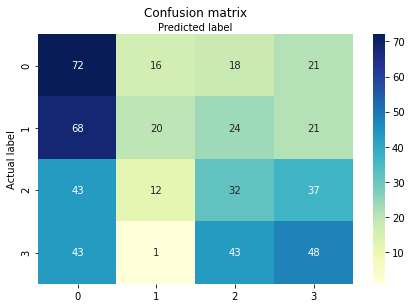

In [36]:
model_svm_linear_gs = SVC(kernel='linear', C=10, gamma=1)
model_svm_linear_gs.fit(X_train, y_train)
y_pred_svm_linear_gs = model_svm_linear_gs.predict(X_test)

results("Linear SVM GridSearch (C=10, gamma=1)", y_pred_svm_linear_gs)

### Summary of Results

In [37]:
results = pd.DataFrame({"model": log_model, 
              "accuracy": log_accuracy, 
              "precision": log_precision, 
              "recall": log_recall, 
              "cnf_matrix": log_cnf_matrix})

In [38]:
results.sort_values(by='accuracy', ascending=False)

,model,accuracy,precision,recall,cnf_matrix
5,Linear SVM,0.333333,0.333333,0.333333,"[[72, 16, 18, 21], [68, 20, 25, 20], [43, 12, ..."
6,"Linear SVM GridSearch (C=10, gamma=1)",0.331407,0.331407,0.331407,"[[72, 16, 18, 21], [68, 20, 24, 21], [43, 12, ..."
0,Logistic Regression,0.329480,0.329480,0.329480,"[[63, 22, 22, 20], [57, 23, 31, 22], [35, 14, ..."
1,"Logistic Regression GridSearch (C=1, penalty='...",0.329480,0.329480,0.329480,"[[63, 22, 22, 20], [57, 23, 31, 22], [35, 14, ..."
3,Gradient Boosting,0.319846,0.319846,0.319846,"[[54, 0, 73, 0], [36, 0, 97, 0], [23, 0, 101, ..."
2,Gradient Boosting,0.115607,0.115607,0.115607,"[[16, 57, 26, 28], [50, 8, 44, 31], [28, 32, 1..."
4,Random Forest,0.077071,0.077071,0.077071,"[[12, 57, 37, 21], [55, 3, 52, 23], [21, 42, 6..."


## Predict new data


### Data given: Maintenance = High Number of doors = 4 Lug Boot Size = Big Safety = High Class Value = Good
### Note: We can see that persons has been intentionally left missing, we will have to fill it up with the different values to estimate buying price

#### Linear SVM

In [74]:
input_data = pd.DataFrame({"maint":[2], "doors":[4], "persons": [5], "lug_boot": [1], "safety": [1], "class": [2]})

In [75]:
model_svm_linear.predict(input_data)

array([3])

#### Linear SVM GridSearch

In [76]:
model_svm_linear_gs.predict(input_data)

array([3])

#### Logistic Regression

In [77]:
model_logreg.predict(input_data)

array([3])

In [78]:
model_gb_cv.predict(input_data)

array([4])

Conclusion: if persons is 2 and 4, buyprice is low. If persons >5, buyprice is medium.

Buying classes <br>
1 - vhigh <br>
2 - high <br>
3 - med <br>
4 - low <br>